In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Generate some data and plot them

In [34]:
## Generate some data and plot them
X_val = np.random.uniform(-4.0, 4.0, size=(100,1))
Y_val = 5.7 * X_val**3 - 3.25 * X_val**2 + 10 * X_val + np.random.normal(scale=40, size=(100,1))

In [35]:
def plot_points(X_, Y_):
    xx = np.linspace(-4, 4, 100)
    yy =  5.7 * xx**3 - 3.25 * xx**2 + 10 * xx
    plt.scatter(X_val , Y_val)
    plt.plot(xx, yy, color='red')

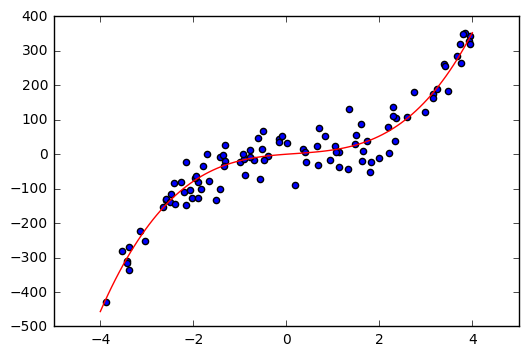

In [36]:
plot_points(X_val, Y_val)

# Building the model

Assume a linear model

$$ \hat{y} = a \cdot x + b  $$

Training objective to find $a$, and $b$ that minmize the loss value $MSE$.
$$ MSE  = \frac{1}{N} \sum_{i=1}^{N} {(y_i - \hat{y}_i)^2}$$

# Build the graph 

In [37]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x')
w = tf.Variable(initial_value=tf.truncated_normal(shape=[]), name='w')
b = tf.Variable(initial_value=0.0, name='b')
y_ = w * x + b

Instructions for updating:
Use `tf.global_variables_initializer` instead.


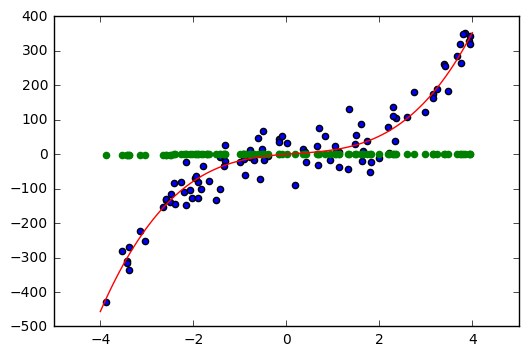

In [38]:
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')



## Define a cost value

In [39]:
y = tf.placeholder(tf.float32, shape=[None, 1])
cost = tf.reduce_mean(tf.squared_difference(y, y_))

## Define optimizer

In [40]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
train_op = minimizer.minimize(cost)

## Run the train op

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step 1 - loss = 23094.947266.
Step 2 - loss = 22038.675781.
Step 3 - loss = 21043.363281.
Step 4 - loss = 20105.484375.
Step 5 - loss = 19221.728516.
Step 6 - loss = 18388.972656.
Step 7 - loss = 17604.269531.
Step 8 - loss = 16864.847656.
Step 9 - loss = 16168.095703.
Step 10 - loss = 15511.548828.
Step 11 - loss = 14892.888672.
Step 12 - loss = 14309.924805.
Step 13 - loss = 13760.600586.
Step 14 - loss = 13242.974609.
Step 15 - loss = 12755.215820.
Step 16 - loss = 12295.602539.
Step 17 - loss = 11862.507812.
Step 18 - loss = 11454.403320.
Step 19 - loss = 11069.845703.
Step 20 - loss = 10707.476562.
Step 21 - loss = 10366.013672.
Step 22 - loss = 10044.254883.
Step 23 - loss = 9741.058594.
Step 24 - loss = 9455.354492.
Step 25 - loss = 9186.135742.
Step 26 - loss = 8932.447266.
Step 27 - loss = 8693.396484.
Step 28 - loss = 8468.135742.
Step 29 - loss = 8255.871094.
Step 30 - loss = 8055.850586.
Step 31 - los

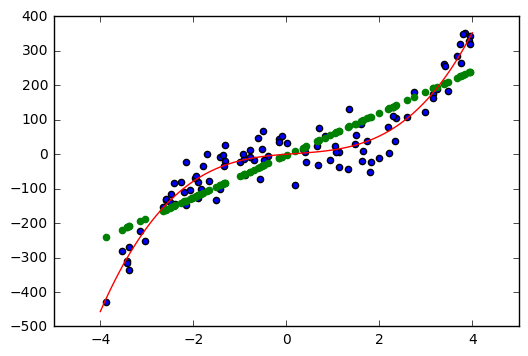

In [41]:
n_steps = 700
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    for step_idx in range(n_steps):
        cur_loss, _ = session.run([cost, train_op], feed_dict={x: X_val, y: Y_val})
        print('Step %d - loss = %f.' %(step_idx+1, cur_loss))
        #y_pred = session.run(y_, feed_dict={x: X_val})
        
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')
    ## 
    w_ , b_ = session.run([w, b])
    print('Final weights and bias ( %f, %f) ' %(w_, b_))

In [42]:
writer = tf.summary.FileWriter('.', tf.get_default_graph())
writer.close()

## We need a more felixible model

** Going to add hidden layer **

In [54]:
graph2 = tf.Graph()
n_hidden = 1
with graph2.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 1])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    
    ## Note w now becomes a matrix 
    w1 = tf.Variable(initial_value=tf.truncated_normal(shape=[1, n_hidden]), name='w1')
    b1 = tf.Variable(initial_value=tf.zeros(shape=[n_hidden]), name='b1')
    
    layer1 = tf.matmul(x, w1) + b1
    layer1_out = tf.nn.sigmoid(layer1)
    
    w2 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_hidden, 1], name='w2'))
    b2 = tf.Variable(initial_value=tf.zeros(shape=[1]), name='b2')
    y_ = tf.matmul(layer1_out, w2) + b2
    
    cost = tf.reduce_mean(tf.squared_difference(y, y_))
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train_op = optimizer.minimize(cost)
    
    

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step 1 - loss = 23005.324219.
Step 2 - loss = 19599.765625.
Step 3 - loss = 16905.224609.
Step 4 - loss = 14700.943359.
Step 5 - loss = 13094.759766.
Step 6 - loss = 11976.137695.
Step 7 - loss = 11169.456055.
Step 8 - loss = 10543.041992.
Step 9 - loss = 10020.798828.
Step 10 - loss = 9577.908203.
Step 11 - loss = 9206.245117.
Step 12 - loss = 8891.891602.
Step 13 - loss = 8624.500977.
Step 14 - loss = 8394.183594.
Step 15 - loss = 8193.850586.
Step 16 - loss = 8018.206543.
Step 17 - loss = 7865.196289.
Step 18 - loss = 7747.294434.
Step 19 - loss = 7828.941895.
Step 20 - loss = 9500.282227.
Step 21 - loss = 9147.552734.
Step 22 - loss = 13610.634766.
Step 23 - loss = 10930.823242.
Step 24 - loss = 10434.506836.
Step 25 - loss = 10052.424805.
Step 26 - loss = 10032.279297.
Step 27 - loss = 10032.339844.
Step 28 - loss = 9614.813477.
Step 29 - loss = 9466.683594.
Step 30 - loss = 10010.448242.
Step 31 - loss = 11

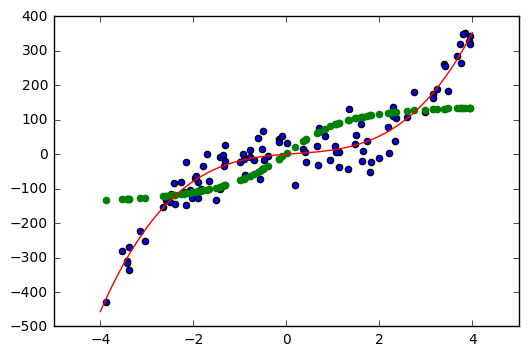

In [53]:
n_steps = 32
with tf.Session(graph=graph2) as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    for step_idx in range(n_steps):
        cur_loss, _ = session.run([cost, train_op], feed_dict={x: X_val, y: Y_val})
        print('Step %d - loss = %f.' %(step_idx+1, cur_loss))
        #y_pred = session.run(y_, feed_dict={x: X_val})
        
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')